# 1. Read the file

In [1]:
import pandas as pd

# Using the raw GitHub content URL
url = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Final%20Exam/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv"

try:
    # Read the CSV file
    df = pd.read_csv(url)
    
    # Display basic information about the dataset
    print("Dataset shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    
    # Display basic information about the columns
    print("\nDataset info:")
    print(df.info())

except Exception as e:
    print(f"Error reading the file: {e}")
    print("Alternative: Please try downloading the file locally and use:")
    print('df = pd.read_csv("path_to_your_local_file.csv")')

Dataset shape: (18182, 15)

First few rows:
   Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1   

# 2. Data Cleaning & Prep.

In [2]:
# Check missing values
missing_data = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine count and percentage into a DataFrame
missing_analysis = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

# Only show variables that have missing values
missing_analysis = missing_analysis[missing_analysis['Missing Count'] > 0]

print("Missing Data Analysis:")
print(missing_analysis)

# Additional insights about complete cases
print("\nTotal number of rows:", len(df))
print("Number of complete cases (rows with no missing data):", 
      len(df.dropna()))
print("Percentage of complete cases: {:.2f}%".format(
    (len(df.dropna()) / len(df)) * 100))

# Visual check of patterns in missing data (if there are any missing values)
if df.isnull().sum().sum() > 0:
    print("\nPattern of missing values in first few rows:")
    print(df.isnull().head(10))

Missing Data Analysis:
      Missing Count  Missing Percentage
text              2               0.011

Total number of rows: 18182
Number of complete cases (rows with no missing data): 18180
Percentage of complete cases: 99.99%

Pattern of missing values in first few rows:
   Unnamed: 0  recipe_number  recipe_code  recipe_name  comment_id  user_id  \
0       False          False        False        False       False    False   
1       False          False        False        False       False    False   
2       False          False        False        False       False    False   
3       False          False        False        False       False    False   
4       False          False        False        False       False    False   
5       False          False        False        False       False    False   
6       False          False        False        False       False    False   
7       False          False        False        False       False    False   
8       False 

Since there are only two missing values (0.01%) in the text column, dropping them will not significantly impact our analysis.

In [3]:
# Show original dataset size
print("Original dataset shape:", df.shape)

# Drop rows with missing values
df = df.dropna()

# Show new dataset size
print("Dataset shape after dropping missing values:", df.shape)

# Verify no missing values remain
missing_check = df.isnull().sum()
if missing_check.sum() == 0:
    print("\nConfirmed: No missing values remain in the dataset")
else:
    print("\nWarning: Some missing values still remain:")
    print(missing_check[missing_check > 0])

Original dataset shape: (18182, 15)
Dataset shape after dropping missing values: (18180, 15)

Confirmed: No missing values remain in the dataset


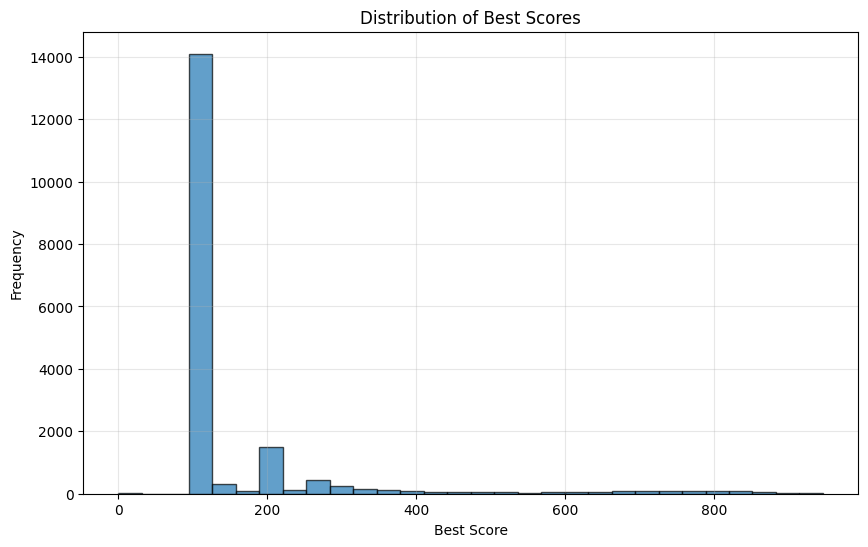


Summary Statistics:
count    18180.000000
mean       153.167987
std        141.081974
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        946.000000
Name: best_score, dtype: float64


In [4]:
import matplotlib.pyplot as plt

# Create figure with specified size
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(df['best_score'], bins=30, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Best Scores', fontsize=12)
plt.xlabel('Best Score')
plt.ylabel('Frequency')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(df['best_score'].describe())

Distribution of Score Categories:

Category Counts:
0 (low, <100): 15 (0.08%)
1 (medium, =100): 14000 (77.01%)
2 (high, >100): 4165 (22.91%)


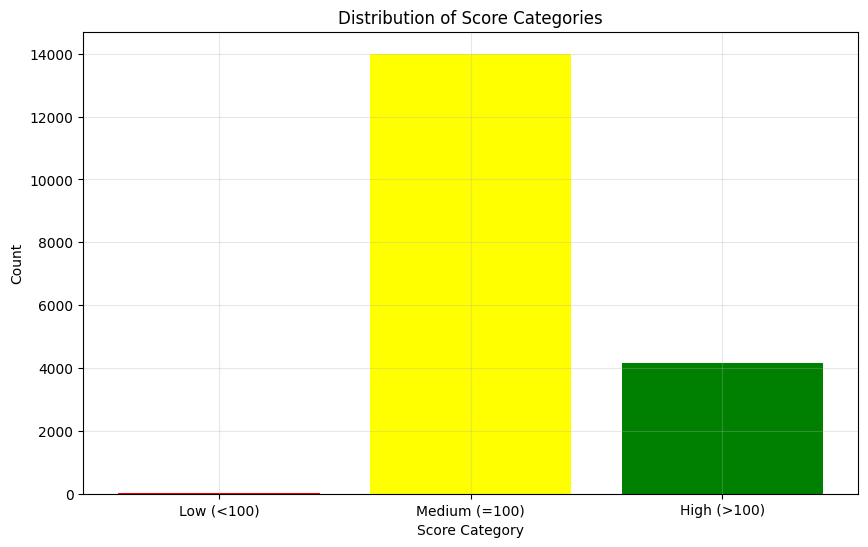

In [5]:
# Create a new column for the categories
def categorize_score(score):
    if score < 100:
        return 0    # low class
    elif score == 100:
        return 1    # medium class
    else:
        return 2    # high class

# Add new column
df['score_category'] = df['best_score'].apply(categorize_score)

# Show distribution of new categories
value_counts = df['score_category'].value_counts().sort_index()
percentages = (value_counts / len(df) * 100).round(2)

print("Distribution of Score Categories:")
print("\nCategory Counts:")
print("0 (low, <100):", value_counts[0], f"({percentages[0]}%)")
print("1 (medium, =100):", value_counts[1], f"({percentages[1]}%)")
print("2 (high, >100):", value_counts[2], f"({percentages[2]}%)")

# Create bar plot of categories
plt.figure(figsize=(10, 6))
plt.bar(['Low (<100)', 'Medium (=100)', 'High (>100)'], 
        value_counts,
        color=['red', 'yellow', 'green'])
plt.title('Distribution of Score Categories')
plt.xlabel('Score Category')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

Summary Statistics of Net Votes:
count    18180.000000
mean         0.539989
std          4.337018
min       -121.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        103.000000
Name: net_votes, dtype: float64


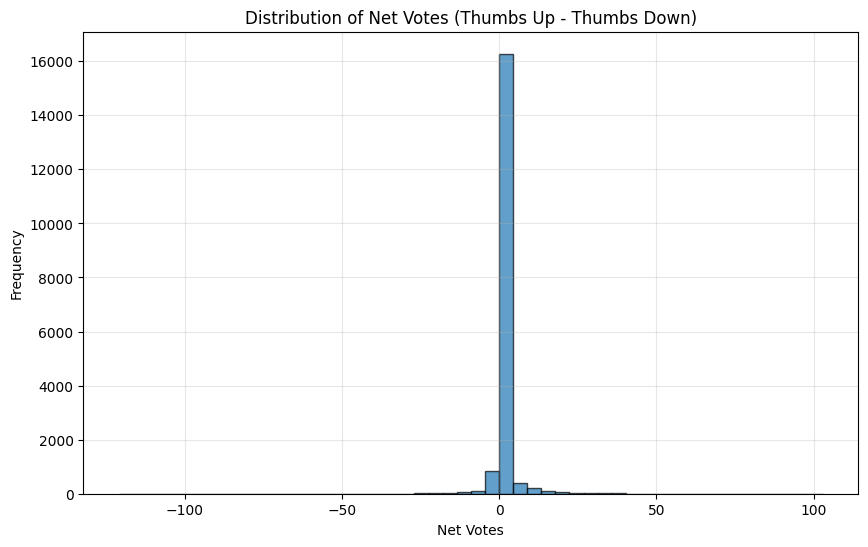


Correlation with score_category:
Correlation coefficient: 0.291

Average net votes by score category:
score_category
0   -21.67
1    -0.10
2     2.78
Name: net_votes, dtype: float64


In [6]:
# Create new feature for net votes
df['net_votes'] = df['thumbs_up'] - df['thumbs_down']

# Show basic statistics of the new feature
print("Summary Statistics of Net Votes:")
print(df['net_votes'].describe())

# Create histogram of net votes distribution
plt.figure(figsize=(10, 6))
plt.hist(df['net_votes'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Net Votes (Thumbs Up - Thumbs Down)')
plt.xlabel('Net Votes')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Show correlation with target variable
print("\nCorrelation with score_category:")
correlation = df['net_votes'].corr(df['score_category'])
print(f"Correlation coefficient: {correlation:.3f}")

# Show average net votes by category
print("\nAverage net votes by score category:")
print(df.groupby('score_category')['net_votes'].mean().round(2))

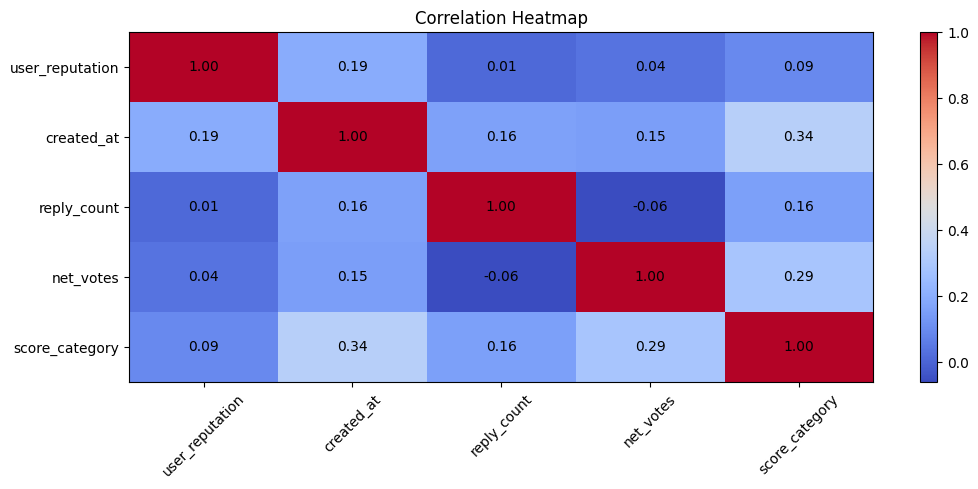

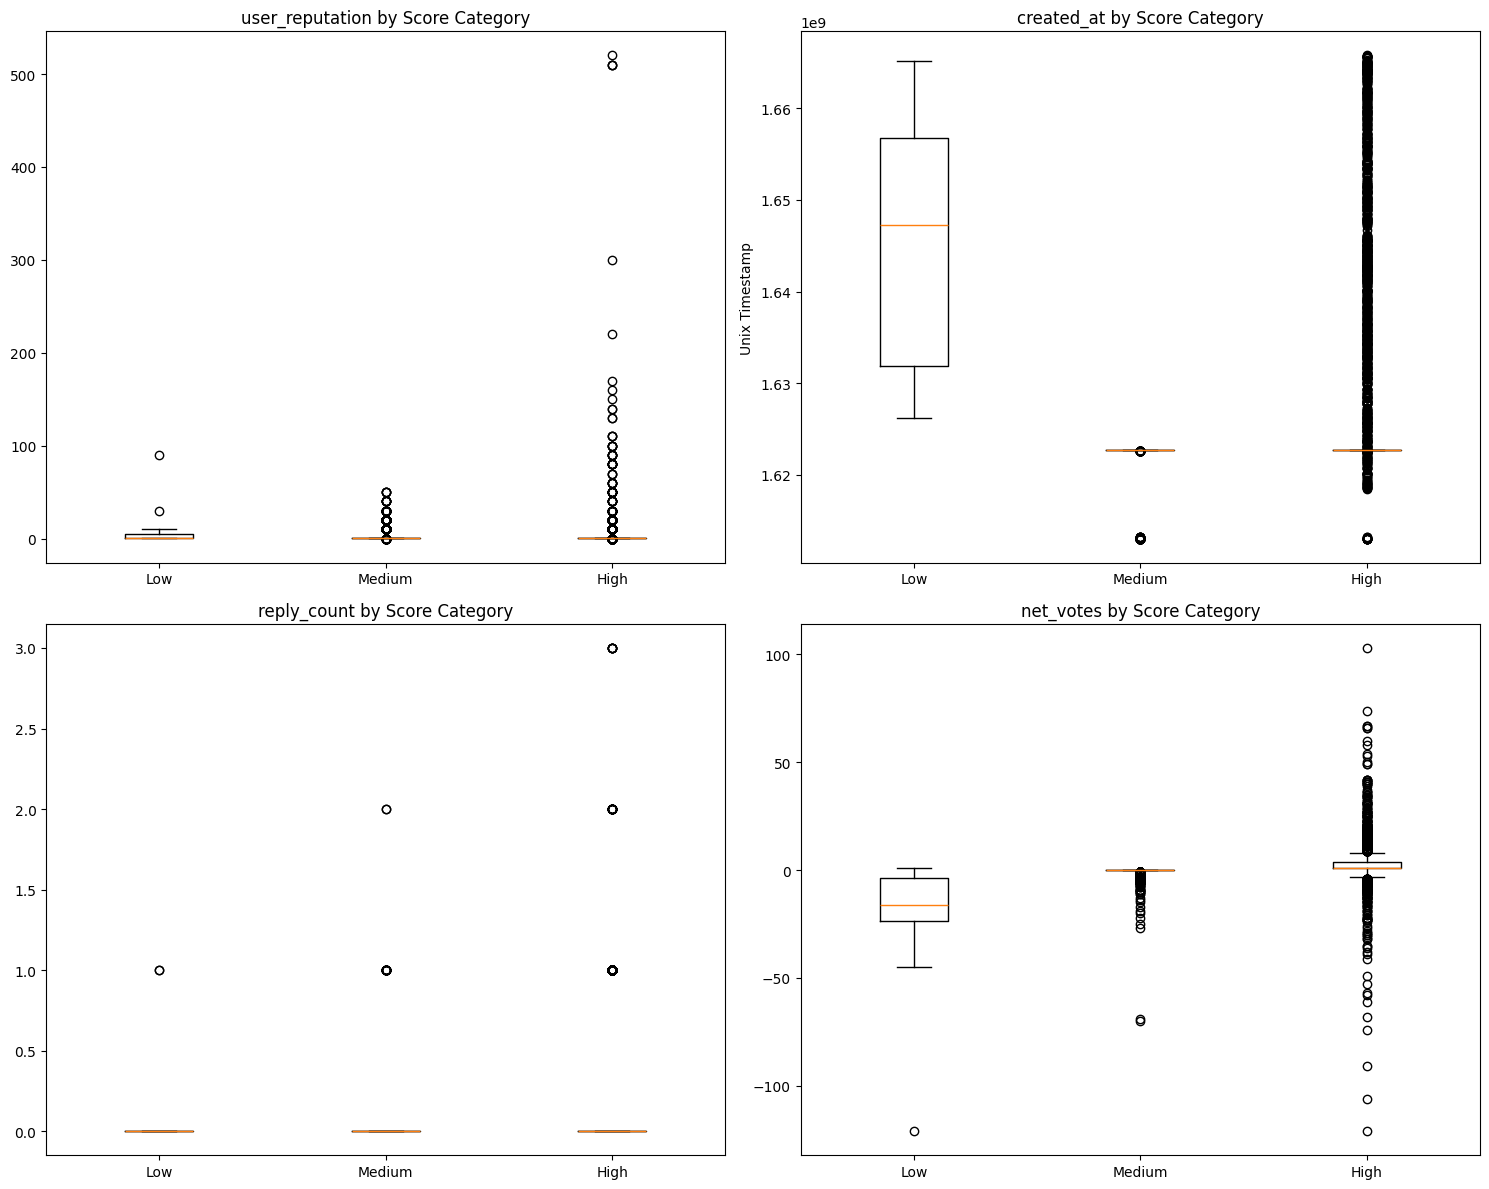


USER_REPUTATION Statistics by Category:
                  count       mean        std  min  25%  50%  75%    max
score_category                                                          
0                  15.0  10.066667  23.438267  1.0  1.0  1.0  5.5   90.0
1               14000.0   1.623429   3.244019  0.0  1.0  1.0  1.0   50.0
2                4165.0   3.933974  19.908212  0.0  1.0  1.0  1.0  520.0

Kruskal-Wallis H-test for user_reputation:
H-statistic: 81.63
p-value: 0.0000

CREATED_AT Statistics by Category:
                  count          mean           std           min  \
score_category                                                      
0                  15.0  1.646090e+09  1.345867e+07  1.626248e+09   
1               14000.0  1.622652e+09  7.926063e+05  1.613035e+09   
2                4165.0  1.627189e+09  1.049689e+07  1.613039e+09   

                         25%           50%           75%           max  
score_category                                              

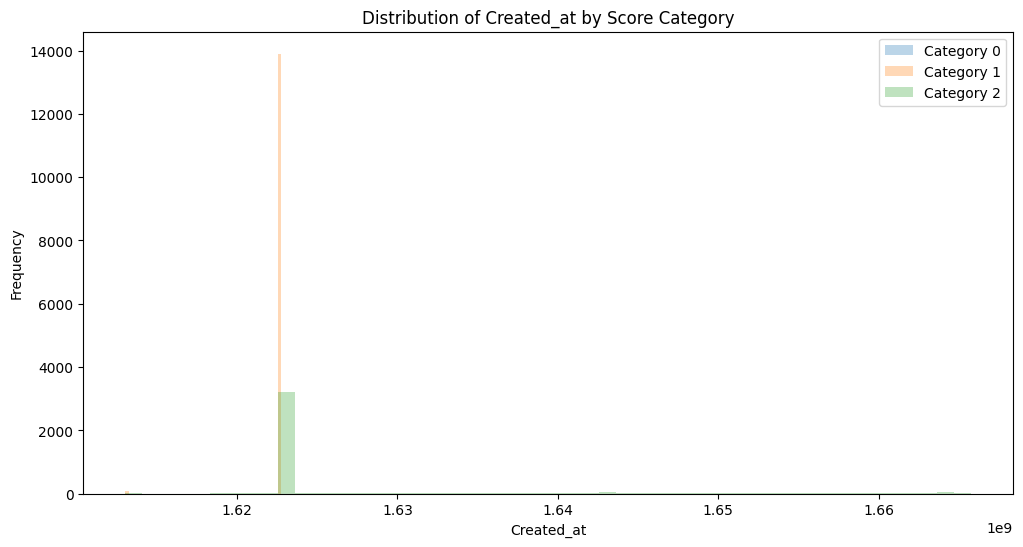

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Select numerical features
numerical_features = ['user_reputation', 'created_at', 'reply_count', 'net_votes', 'score_category']

# 1. Correlation Heatmap
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(numerical_features)), numerical_features, rotation=45)
plt.yticks(range(len(numerical_features)), numerical_features)
plt.title('Correlation Heatmap')

# Add correlation values
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", 
                ha='center', va='center')

# 2. Box plots for all numerical features
plt.figure(figsize=(15, 12))
features = ['user_reputation', 'created_at', 'reply_count', 'net_votes']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    plt.boxplot([df[df['score_category'] == cat][feature] for cat in [0, 1, 2]])
    plt.title(f'{feature} by Score Category')
    plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
    if feature == 'created_at':
        plt.ylabel('Unix Timestamp')
plt.tight_layout()
plt.show()

# 3. Print summary statistics and statistical tests
for feature in features:
    print(f"\n{feature.upper()} Statistics by Category:")
    print(df.groupby('score_category')[feature].describe())
    
    # Kruskal-Wallis H-test
    h_stat, p_val = stats.kruskal(df[df['score_category'] == 0][feature],
                                 df[df['score_category'] == 1][feature],
                                 df[df['score_category'] == 2][feature])
    print(f"\nKruskal-Wallis H-test for {feature}:")
    print(f"H-statistic: {h_stat:.2f}")
    print(f"p-value: {p_val:.4f}")

# 4. Distribution of created_at by category
plt.figure(figsize=(12, 6))
for category in [0, 1, 2]:
    plt.hist(df[df['score_category'] == category]['created_at'], 
            alpha=0.3, 
            label=f'Category {category}',
            bins=50)
plt.title('Distribution of Created_at by Score Category')
plt.xlabel('Created_at')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 3. Data Prepocessing

In [8]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ""
        
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the text column
print("Starting text preprocessing...")
print("Original text sample:")
print(df['text'].head())

df['processed_text'] = df['text'].apply(preprocess_text)

print("\nProcessed text sample:")
print(df['processed_text'].head())

# Print some statistics
print("\nText Processing Statistics:")
print(f"Number of rows with empty text before processing: {df['text'].isna().sum()}")
print(f"Number of rows with empty text after processing: {df['processed_text'].str.len().eq(0).sum()}")
print("\nAverage text length:")
print(f"Before preprocessing: {df['text'].str.len().mean():.2f} characters")
print(f"After preprocessing: {df['processed_text'].str.len().mean():.2f} characters")

# Show a few examples of before and after
print("\nDetailed Examples (Before -> After):")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Before: {df['text'].iloc[i][:100]}...")
    print(f"After: {df['processed_text'].iloc[i][:100]}...")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neilx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neilx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neilx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Starting text preprocessing...
Original text sample:
0    I tweaked it a little, removed onions because ...
1    Bush used to have a white chili bean and it ma...
2    I have a very complicated white chicken chili ...
3    In your introduction, you mentioned cream chee...
4    Wonderful! I made this for a &#34;Chili/Stew&#...
Name: text, dtype: object

Processed text sample:
0    tweaked little removed onion onion hater house...
1    bush used white chili bean made recipe super s...
2    complicated white chicken chili recipe made ye...
3    introduction mentioned cream cheese none liste...
4    wonderful made chilistew night dinner church e...
Name: processed_text, dtype: object

Text Processing Statistics:
Number of rows with empty text before processing: 0
Number of rows with empty text after processing: 16

Average text length:
Before preprocessing: 203.91 characters
After preprocessing: 124.65 characters

Detailed Examples (Before -> After):

Example 1:
Before: I tweaked it a litt

In [9]:
from gensim.models import Word2Vec
import numpy as np

# First, we need to tokenize our processed text into lists of words
# because Word2Vec expects a list of word lists
text_tokens = df['processed_text'].apply(lambda x: x.split())

# Train Word2Vec model
# Parameters:
# vector_size: dimension of the word vectors
# window: maximum distance between current and predicted word
# min_count: minimum frequency of words to consider
# workers: number of CPU cores to use for training
w2v_model = Word2Vec(sentences=text_tokens,
                    vector_size=100,
                    window=5,
                    min_count=2,
                    workers=4)

# Function to create document vectors by averaging word vectors
def get_doc_vector(text, model):
    words = text.split()
    # Filter words that are in the model's vocabulary
    words = [word for word in words if word in model.wv]
    if len(words) == 0:
        # Return zero vector if no words are in vocabulary
        return np.zeros(model.vector_size)
    # Calculate average vector
    return np.mean([model.wv[word] for word in words], axis=0)

# Create document vectors for each review
print("Creating document vectors...")
doc_vectors = df['processed_text'].apply(lambda x: get_doc_vector(x, w2v_model))

# Convert to numpy array for easier handling
X = np.array(doc_vectors.tolist())

print("\nWord2Vec Feature Extraction Summary:")
print(f"Vector dimension: {w2v_model.vector_size}")
print(f"Vocabulary size: {len(w2v_model.wv)}")
print(f"Feature matrix shape: {X.shape}")

# Show example of word similarities
print("\nExample word similarities:")
try:
    # Try to find similar words for 'delicious' if it exists in vocabulary
    if 'delicious' in w2v_model.wv:
        print("\nWords most similar to 'delicious':")
        print(w2v_model.wv.most_similar('delicious', topn=5))
except Exception as e:
    print("Could not find 'delicious' in vocabulary")

# Save vectors for later use
df_vectors = pd.DataFrame(X, columns=[f'vec_{i}' for i in range(w2v_model.vector_size)])

print("\nFirst few rows of the feature matrix:")
print(df_vectors.head())

Creating document vectors...

Word2Vec Feature Extraction Summary:
Vector dimension: 100
Vocabulary size: 6004
Feature matrix shape: (18180, 100)

Example word similarities:

Words most similar to 'delicious':
[('tasty', 0.8625931143760681), ('excellent', 0.8466412425041199), ('wonderful', 0.8389061689376831), ('fantastic', 0.8352092504501343), ('yummy', 0.8165346384048462)]

First few rows of the feature matrix:
      vec_0     vec_1     vec_2     vec_3     vec_4     vec_5     vec_6  \
0 -0.215478  0.027920  0.252174  0.049060  0.185553 -0.470437 -0.011461   
1 -0.323546  0.283014 -0.018191  0.095018  0.209515 -0.372686  0.144748   
2 -0.274411  0.109078  0.011578  0.005581  0.206396 -0.439990  0.131715   
3  0.036359 -0.192122 -0.067394  0.147788  0.182240 -0.421737 -0.142001   
4 -0.485209  0.202818 -0.093472  0.000226  0.273291 -0.310952 -0.050596   

      vec_7     vec_8     vec_9  ...    vec_90    vec_91    vec_92    vec_93  \
0  0.913375  0.136901 -0.451141  ... -0.129939  0.01

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Select the features to scale
features_to_scale = ['created_at', 'reply_count', 'net_votes']

# Create and fit the scaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Show before and after statistics
print("Before scaling:")
print(df[features_to_scale].describe())

print("\nAfter scaling:")
print(df_scaled[features_to_scale].describe())

# Verify all values are between 0 and 1
print("\nValue ranges after scaling:")
for feature in features_to_scale:
    print(f"\n{feature}:")
    print(f"Min: {df_scaled[feature].min()}")
    print(f"Max: {df_scaled[feature].max()}")

# Store the scaled features for later use
X_scaled = df_scaled[features_to_scale]
y = df['score_category']

print("\nFinal scaled feature matrix shape:", X_scaled.shape)
print("Target variable shape:", y.shape)

Before scaling:
         created_at   reply_count     net_votes
count  1.818000e+04  18180.000000  18180.000000
mean   1.623711e+09      0.014631      0.539989
std    5.468988e+06      0.137981      4.337018
min    1.613035e+09      0.000000   -121.000000
25%    1.622717e+09      0.000000      0.000000
50%    1.622718e+09      0.000000      0.000000
75%    1.622718e+09      0.000000      0.000000
max    1.665756e+09      3.000000    103.000000

After scaling:
         created_at   reply_count     net_votes
count  18180.000000  18180.000000  18180.000000
mean       0.202487      0.004877      0.542589
std        0.103735      0.045994      0.019362
min        0.000000      0.000000      0.000000
25%        0.183645      0.000000      0.540179
50%        0.183654      0.000000      0.540179
75%        0.183663      0.000000      0.540179
max        1.000000      1.000000      1.000000

Value ranges after scaling:

created_at:
Min: 0.0
Max: 1.0

reply_count:
Min: 0.0
Max: 1.0

net_votes:


In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, SimpleRNN, BatchNormalization, concatenate, Reshape, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import numpy as np

# Custom layer for reshaping
class ReshapeLayer(Layer):
    def __init__(self):
        super(ReshapeLayer, self).__init__()
    
    def call(self, inputs):
        return tf.reshape(inputs, (-1, 1, inputs.shape[-1]))

def build_rnn_hybrid():
    # Numerical input
    num_input = Input(shape=(3,))  # 3 numerical features
    num_bn = BatchNormalization()(num_input)
    num_reshape = ReshapeLayer()(num_bn)  # Reshape to (batch_size, 1, features)
    num_rnn = SimpleRNN(32)(num_reshape)
    
    # Text input
    text_input = Input(shape=(100,))  # Word2Vec dimensions
    text_bn = BatchNormalization()(text_input)
    text_reshape = ReshapeLayer()(text_bn)
    text_rnn = SimpleRNN(64)(text_reshape)
    
    # Combine
    combined = concatenate([num_rnn, text_rnn])
    bn = BatchNormalization()(combined)
    dense = Dense(64, activation='relu')(bn)
    output = Dense(3, activation='softmax')(dense)
    
    model = Model(inputs=[num_input, text_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_lstm_hybrid():
    # Numerical input
    num_input = Input(shape=(3,))
    num_bn = BatchNormalization()(num_input)
    num_reshape = ReshapeLayer()(num_bn)
    num_lstm = LSTM(32)(num_reshape)
    
    # Text input
    text_input = Input(shape=(100,))
    text_bn = BatchNormalization()(text_input)
    text_reshape = ReshapeLayer()(text_bn)
    text_lstm = LSTM(64)(text_reshape)
    
    # Combine
    combined = concatenate([num_lstm, text_lstm])
    bn = BatchNormalization()(combined)
    dense = Dense(64, activation='relu')(bn)
    output = Dense(3, activation='softmax')(dense)
    
    model = Model(inputs=[num_input, text_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation and evaluation
def cross_validate_model(model_func, X_num, X_text, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_num)):
        print(f"\nFold {fold+1}/{n_splits}")
        
        # Split data
        X_num_train, X_num_val = X_num[train_idx], X_num[val_idx]
        X_text_train, X_text_val = X_text[train_idx], X_text[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Build and train model
        model = model_func()
        history = model.fit(
            [X_num_train, X_text_train],
            y_train,
            validation_data=([X_num_val, X_text_val], y_val),
            epochs=50,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Predict and calculate F1 score
        y_pred = model.predict([X_num_val, X_text_val])
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_val_classes = np.argmax(y_val, axis=1)
        f1 = f1_score(y_val_classes, y_pred_classes, average='macro')
        f1_scores.append(f1)
        print(f"Fold {fold+1} F1 Score: {f1:.4f}")
    
    return np.mean(f1_scores), np.std(f1_scores)

# Prepare data and run models
def run_models():
    # Prepare data (assuming we have X_scaled and df_vectors from previous steps)
    numerical_features = X_scaled.values
    text_features = np.array(df_vectors)
    y_encoded = tf.keras.utils.to_categorical(y)
    
    # Run RNN and LSTM models first
    models = {
        'RNN-RNN': build_rnn_hybrid,
        'LSTM-LSTM': build_lstm_hybrid
    }
    
    results = {}
    for name, model_func in models.items():
        print(f"\nTraining {name} model...")
        mean_f1, std_f1 = cross_validate_model(
            model_func, 
            numerical_features, 
            text_features, 
            y_encoded
        )
        results[name] = {'mean_f1': mean_f1, 'std_f1': std_f1}
        print(f"{name} - Mean F1: {mean_f1:.4f} (±{std_f1:.4f})")
    
    return results

# Run the models
results = run_models()


Training RNN-RNN model...

Fold 1/5

Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_2', 'keras_tensor_6']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8376 - loss: 0.4189 - val_accuracy: 0.2434 - val_loss: 1.4395
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9288 - loss: 0.2137 - val_accuracy: 0.9766 - val_loss: 0.1105
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9427 - loss: 0.1739 - val_accuracy: 0.9769 - val_loss: 0.1009
Epoch 4/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9582 - loss: 0.1378 - val_accuracy: 0.9772 - val_loss: 0.1037
Epoch 5/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.1318 - val_accuracy: 0.9777 - val_loss: 0.0900
Epoch 6/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9645 - loss: 0.1250 - val_accuracy: 0.9780 - val_loss: 0.0900
Epoch 7/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9660 - loss: 0.1173 - val_accuracy: 0.9766 - val_loss: 0.0875
Epoch 8/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9661 - loss: 0.1153 - val_accuracy: 0.9780 - val_

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_14', 'keras_tensor_18']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8627 - loss: 0.3919 - val_accuracy: 0.2533 - val_loss: 1.4095
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9436 - loss: 0.1767 - val_accuracy: 0.9670 - val_loss: 0.1597
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9420 - loss: 0.1712 - val_accuracy: 0.9678 - val_loss: 0.1321
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 2 F1 Score: 0.1511

Fold 3/5
Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_26', 'keras_tensor_30']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8443 - loss: 0.4206 - val_accuracy: 0.2324 - val_loss: 1.6950
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9383 - loss: 0.1936 - val_accuracy: 0.9772 - val_loss: 0.1035
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9488 - loss: 0.1631 - val_accuracy: 0.9763 - val_loss: 0.0953
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 3 F1 Score: 0.1997

Fold 4/5
Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_38', 'keras_tensor_42']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8661 - loss: 0.4114 - val_accuracy: 0.4362 - val_loss: 0.7866
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9343 - loss: 0.2018 - val_accuracy: 0.9717 - val_loss: 0.1210
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9521 - loss: 0.1665 - val_accuracy: 0.9700 - val_loss: 0.1130
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 4 F1 Score: 0.2908

Fold 5/5
Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_50', 'keras_tensor_54']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8549 - loss: 0.4322 - val_accuracy: 0.2384 - val_loss: 1.8594
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9350 - loss: 0.1957 - val_accuracy: 0.9673 - val_loss: 0.1316
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9553 - loss: 0.1476 - val_accuracy: 0.9675 - val_loss: 0.1262
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 5 F1 Score: 0.1347
RNN-RNN - Mean F1: 0.2841 (±0.1881)

Training LSTM-LSTM model...

Fold 1/5
Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_62', 'keras_tensor_66']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8049 - loss: 0.5112 - val_accuracy: 0.8911 - val_loss: 0.4531
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9437 - loss: 0.1797 - val_accuracy: 0.9750 - val_loss: 0.1029
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1281 - val_accuracy: 0.9728 - val_loss: 0.1119
Epoch 4/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1189 - val_accuracy: 0.9730 - val_loss: 0.1076
Epoch 5/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1096 - val_accuracy: 0.9719 - val_loss: 0.1171
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 1 F1 Score: 0.6423

Fold 2/5
Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_74', 'keras_tensor_78']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8395 - loss: 0.4505 - val_accuracy: 0.8003 - val_loss: 0.4904
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1559 - val_accuracy: 0.9684 - val_loss: 0.1326
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1219 - val_accuracy: 0.9670 - val_loss: 0.1360
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 2 F1 Score: 0.5052

Fold 3/5
Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_86', 'keras_tensor_90']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8280 - loss: 0.4549 - val_accuracy: 0.4744 - val_loss: 0.7044
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1674 - val_accuracy: 0.9752 - val_loss: 0.1129
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9584 - loss: 0.1351 - val_accuracy: 0.9758 - val_loss: 0.0921
Epoch 4/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1104 - val_accuracy: 0.9755 - val_loss: 0.0974
Epoch 5/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1144 - val_accuracy: 0.9772 - val_loss: 0.0877
Epoch 6/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0966 - val_accuracy: 0.9755 - val_loss: 0.0945
Epoch 7/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.1058 - val_accuracy: 0.9777 - val_loss: 0.0949
Epoch 8/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0959 - val_accuracy: 0.9758 - val_

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_98', 'keras_tensor_102']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8444 - loss: 0.4557 - val_accuracy: 0.7343 - val_loss: 0.5411
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1730 - val_accuracy: 0.9728 - val_loss: 0.1112
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9621 - loss: 0.1325 - val_accuracy: 0.9681 - val_loss: 0.1160
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 4 F1 Score: 0.4638

Fold 5/5
Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_110', 'keras_tensor_114']. Received: the structure of inputs=('*', '*')
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8139 - loss: 0.4875 - val_accuracy: 0.5814 - val_loss: 0.6581
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9546 - loss: 0.1583 - val_accuracy: 0.9670 - val_loss: 0.1269
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.1109 - val_accuracy: 0.9681 - val_loss: 0.1236
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 5 F1 Score: 0.3800
LSTM-LSTM - Mean F1: 0.5916 (±0.2058)


In [22]:
import tensorflow as tf
from transformers import BartTokenizer, TFBartModel
from tensorflow.keras.layers import Dense, Input, LSTM, SimpleRNN, BatchNormalization, concatenate, Layer
from tensorflow.keras.models import Model
import numpy as np

class RNNLayer(Layer):
    def __init__(self, units=16):
        super().__init__()
        self.rnn = SimpleRNN(units)
    
    def call(self, inputs):
        # Expand dimensions properly using Keras operations
        x = tf.expand_dims(inputs, axis=1)
        return self.rnn(x)

class SimpleBartEmbedding(Layer):
    def __init__(self, max_length=64):
        super().__init__()
        self.bart = TFBartModel.from_pretrained('facebook/bart-base')
        self.bart.trainable = False
        self.max_length = max_length
    
    def call(self, inputs):
        input_ids = tf.cast(inputs[0], tf.int32)
        attention_mask = tf.cast(inputs[1], tf.int32)
        
        bart_output = self.bart(
            input_ids=input_ids,
            attention_mask=attention_mask,
            training=False
        )
        return bart_output[0][:, 0, :]

def build_simple_hybrid():
    # Numerical input branch
    num_input = Input(shape=(3,))
    num_rnn = RNNLayer(16)(num_input)
    
    # Text input branch
    text_input = Input(shape=(64,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(64,), dtype=tf.int32, name='attention_mask')
    
    # BART embedding
    bart_layer = SimpleBartEmbedding()
    bart_embedding = bart_layer([text_input, attention_mask])
    
    # Combine branches
    combined = concatenate([num_rnn, bart_embedding])
    output = Dense(3, activation='softmax')(combined)
    
    model = Model(
        inputs=[num_input, text_input, attention_mask],
        outputs=output
    )
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

class BartPreprocessor:
    def __init__(self, max_length=64):
        self.tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
        self.max_length = max_length
    
    def preprocess(self, texts, max_samples=1000):
        if len(texts) > max_samples:
            indices = np.random.choice(len(texts), max_samples, replace=False)
            texts = texts.iloc[indices] if hasattr(texts, 'iloc') else texts[indices]
        
        if isinstance(texts, pd.Series):
            texts = texts.tolist()
        
        encodings = self.tokenizer(
            texts,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='np'
        )
        return encodings

def quick_validate(X_num, texts, y, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []
    
    # Sample data
    sample_size = min(1000, len(X_num))
    indices = np.random.choice(len(X_num), sample_size, replace=False)
    
    X_num = X_num[indices]
    texts = texts.iloc[indices] if hasattr(texts, 'iloc') else texts[indices]
    y = y[indices]
    
    # Initialize preprocessor
    preprocessor = BartPreprocessor()
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_num)):
        print(f"\nFold {fold+1}/{n_splits}")
        
        # Split data
        X_num_train, X_num_val = X_num[train_idx], X_num[val_idx]
        texts_train = texts.iloc[train_idx] if hasattr(texts, 'iloc') else texts[train_idx]
        texts_val = texts.iloc[val_idx] if hasattr(texts, 'iloc') else texts[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Preprocess text
        train_encodings = preprocessor.preprocess(texts_train)
        val_encodings = preprocessor.preprocess(texts_val)
        
        # Train model
        model = build_simple_hybrid()
        history = model.fit(
            [
                X_num_train,
                train_encodings['input_ids'],
                train_encodings['attention_mask']
            ],
            y_train,
            validation_data=([
                X_num_val,
                val_encodings['input_ids'],
                val_encodings['attention_mask']
            ], y_val),
            epochs=10,
            batch_size=32,
            verbose=1
        )
        
        # Evaluate
        y_pred = model.predict([
            X_num_val,
            val_encodings['input_ids'],
            val_encodings['attention_mask']
        ])
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_val_classes = np.argmax(y_val, axis=1)
        f1 = f1_score(y_val_classes, y_pred_classes, average='macro')
        f1_scores.append(f1)
        print(f"Fold {fold+1} F1 Score: {f1:.4f}")
    
    return np.mean(f1_scores), np.std(f1_scores)

# Run quick test
def run_quick_test():
    numerical_features = X_scaled.values
    text_data = df['processed_text']
    y_encoded = tf.keras.utils.to_categorical(y)
    
    print("Running quick test of hybrid model...")
    mean_f1, std_f1 = quick_validate(
        numerical_features,
        text_data,
        y_encoded
    )
    print(f"\nFinal Results - Mean F1: {mean_f1:.4f} (±{std_f1:.4f})")

# Run the test
run_quick_test()

Running quick test of hybrid model...

Fold 1/3


All PyTorch model weights were used when initializing TFBartModel.

All the weights of TFBartModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartModel for predictions without further training.


Epoch 1/10


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_139', 'input_ids', 'attention_mask']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4067 - loss: 2.6871 - val_accuracy: 0.2605 - val_loss: 1.0726
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5366 - loss: 0.8136 - val_accuracy: 0.7186 - val_loss: 0.5852
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7640 - loss: 0.5556 - val_accuracy: 0.7725 - val_loss: 0.5277
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7245 - loss: 0.5912 - val_accuracy: 0.7305 - val_loss: 0.5551
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7538 - loss: 0.5569 - val_accuracy: 0.7635 - val_loss: 0.5240
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7742 - loss: 0.5340 - val_accuracy: 0.7754 - val_loss: 0.5200
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7671 - loss: 0.5349 - val_accuracy: 0.7754 - val_loss: 0.5252
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7549 - loss: 0.5353 - val_accuracy: 0.7754 - val_loss: 0.5230
Epo

All PyTorch model weights were used when initializing TFBartModel.

All the weights of TFBartModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartModel for predictions without further training.


Epoch 1/10


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_145', 'input_ids', 'attention_mask']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6964 - loss: 0.7181 - val_accuracy: 0.6637 - val_loss: 0.6288
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7149 - loss: 0.5595 - val_accuracy: 0.6997 - val_loss: 0.6134
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7204 - loss: 0.5799 - val_accuracy: 0.7688 - val_loss: 0.6231
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7725 - loss: 0.5398 - val_accuracy: 0.7718 - val_loss: 0.5600
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7561 - loss: 0.5648 - val_accuracy: 0.7598 - val_loss: 0.5585
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7714 - loss: 0.5001 - val_accuracy: 0.6877 - val_loss: 0.6078
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7488 - loss: 0.5349 - val_accuracy: 0.7237 - val_loss: 0.5694
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7785 - loss: 0.5044 - val_accuracy: 0.7718 - val_loss: 0.5659
Epo

All PyTorch model weights were used when initializing TFBartModel.

All the weights of TFBartModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartModel for predictions without further training.


Epoch 1/10


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_151', 'input_ids', 'attention_mask']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3819 - loss: 3.1044 - val_accuracy: 0.5826 - val_loss: 0.6610
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6298 - loss: 0.6883 - val_accuracy: 0.6907 - val_loss: 0.6005
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7654 - loss: 0.5536 - val_accuracy: 0.7477 - val_loss: 0.5719
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7713 - loss: 0.5257 - val_accuracy: 0.7477 - val_loss: 0.5689
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7323 - loss: 0.5617 - val_accuracy: 0.7477 - val_loss: 0.6194
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7929 - loss: 0.4936 - val_accuracy: 0.7477 - val_loss: 0.5734
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7824 - loss: 0.5066 - val_accuracy: 0.7477 - val_loss: 0.6399
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7668 - loss: 0.5516 - val_accuracy: 0.7477 - val_loss: 0.5695
Epo

In [23]:
import tensorflow as tf
from transformers import BartTokenizer, TFBartModel
from tensorflow.keras.layers import Dense, Input, LSTM, BatchNormalization, concatenate, Layer
from tensorflow.keras.models import Model
import numpy as np

class LSTMLayer(Layer):
    def __init__(self, units=16):
        super().__init__()
        self.lstm = LSTM(units)
    
    def call(self, inputs):
        # Expand dimensions properly using Keras operations
        x = tf.expand_dims(inputs, axis=1)
        return self.lstm(x)

class SimpleBartEmbedding(Layer):
    def __init__(self, max_length=64):
        super().__init__()
        self.bart = TFBartModel.from_pretrained('facebook/bart-base')
        self.bart.trainable = False
        self.max_length = max_length
    
    def call(self, inputs):
        input_ids = tf.cast(inputs[0], tf.int32)
        attention_mask = tf.cast(inputs[1], tf.int32)
        
        bart_output = self.bart(
            input_ids=input_ids,
            attention_mask=attention_mask,
            training=False
        )
        return bart_output[0][:, 0, :]

def build_lstm_bart_hybrid():
    # Numerical input branch with LSTM
    num_input = Input(shape=(3,))
    num_lstm = LSTMLayer(16)(num_input)
    
    # Text input branch with BART
    text_input = Input(shape=(64,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(64,), dtype=tf.int32, name='attention_mask')
    
    # BART embedding
    bart_layer = SimpleBartEmbedding()
    bart_embedding = bart_layer([text_input, attention_mask])
    
    # Combine branches
    combined = concatenate([num_lstm, bart_embedding])
    dense = Dense(32, activation='relu')(combined)
    output = Dense(3, activation='softmax')(dense)
    
    model = Model(
        inputs=[num_input, text_input, attention_mask],
        outputs=output
    )
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

class BartPreprocessor:
    def __init__(self, max_length=64):
        self.tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
        self.max_length = max_length
    
    def preprocess(self, texts, max_samples=1000):
        if len(texts) > max_samples:
            indices = np.random.choice(len(texts), max_samples, replace=False)
            texts = texts.iloc[indices] if hasattr(texts, 'iloc') else texts[indices]
        
        if isinstance(texts, pd.Series):
            texts = texts.tolist()
        
        encodings = self.tokenizer(
            texts,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='np'
        )
        return encodings

def quick_validate(X_num, texts, y, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    f1_scores = []
    
    # Sample data
    sample_size = min(1000, len(X_num))
    indices = np.random.choice(len(X_num), sample_size, replace=False)
    
    X_num = X_num[indices]
    texts = texts.iloc[indices] if hasattr(texts, 'iloc') else texts[indices]
    y = y[indices]
    
    # Initialize preprocessor
    preprocessor = BartPreprocessor()
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_num)):
        print(f"\nFold {fold+1}/{n_splits}")
        
        # Split data
        X_num_train, X_num_val = X_num[train_idx], X_num[val_idx]
        texts_train = texts.iloc[train_idx] if hasattr(texts, 'iloc') else texts[train_idx]
        texts_val = texts.iloc[val_idx] if hasattr(texts, 'iloc') else texts[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Preprocess text
        train_encodings = preprocessor.preprocess(texts_train)
        val_encodings = preprocessor.preprocess(texts_val)
        
        # Train model
        model = build_lstm_bart_hybrid()
        history = model.fit(
            [
                X_num_train,
                train_encodings['input_ids'],
                train_encodings['attention_mask']
            ],
            y_train,
            validation_data=([
                X_num_val,
                val_encodings['input_ids'],
                val_encodings['attention_mask']
            ], y_val),
            epochs=10,
            batch_size=32,
            verbose=1
        )
        
        # Evaluate
        y_pred = model.predict([
            X_num_val,
            val_encodings['input_ids'],
            val_encodings['attention_mask']
        ])
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_val_classes = np.argmax(y_val, axis=1)
        f1 = f1_score(y_val_classes, y_pred_classes, average='macro')
        f1_scores.append(f1)
        print(f"Fold {fold+1} F1 Score: {f1:.4f}")
    
    return np.mean(f1_scores), np.std(f1_scores)

# Run test with LSTM-BART hybrid
def run_lstm_bart_test():
    numerical_features = X_scaled.values
    text_data = df['processed_text']
    y_encoded = tf.keras.utils.to_categorical(y)
    
    print("Running test of LSTM-BART hybrid model...")
    mean_f1, std_f1 = quick_validate(
        numerical_features,
        text_data,
        y_encoded
    )
    print(f"\nFinal Results - Mean F1: {mean_f1:.4f} (±{std_f1:.4f})")

# Run the test
run_lstm_bart_test()

Running test of LSTM-BART hybrid model...

Fold 1/3


All PyTorch model weights were used when initializing TFBartModel.

All the weights of TFBartModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartModel for predictions without further training.


Epoch 1/10


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_157', 'input_ids', 'attention_mask']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7029 - loss: 0.6993 - val_accuracy: 0.7725 - val_loss: 0.5572
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7731 - loss: 0.6450 - val_accuracy: 0.7754 - val_loss: 0.5347
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7801 - loss: 0.5350 - val_accuracy: 0.7754 - val_loss: 0.5317
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7594 - loss: 0.5549 - val_accuracy: 0.7754 - val_loss: 0.5531
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7931 - loss: 0.5108 - val_accuracy: 0.7754 - val_loss: 0.5305
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7448 - loss: 0.5414 - val_accuracy: 0.7754 - val_loss: 0.5350
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7496 - loss: 0.5526 - val_accuracy: 0.7814 - val_loss: 0.5306
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7965 - loss: 0.4828 - val_accuracy: 0.7605 - val_loss: 0.5439
Epo

All PyTorch model weights were used when initializing TFBartModel.

All the weights of TFBartModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartModel for predictions without further training.


Epoch 1/10


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_164', 'input_ids', 'attention_mask']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7325 - loss: 0.7237 - val_accuracy: 0.7658 - val_loss: 0.6543
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7678 - loss: 0.6139 - val_accuracy: 0.6006 - val_loss: 0.6510
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7320 - loss: 0.6161 - val_accuracy: 0.7658 - val_loss: 0.5770
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7735 - loss: 0.5459 - val_accuracy: 0.7658 - val_loss: 0.5521
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7521 - loss: 0.5708 - val_accuracy: 0.6727 - val_loss: 0.6179
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7785 - loss: 0.5561 - val_accuracy: 0.7628 - val_loss: 0.5383
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7895 - loss: 0.5156 - val_accuracy: 0.7658 - val_loss: 0.6208
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7872 - loss: 0.5199 - val_accuracy: 0.7658 - val_loss: 0.5366
Epo

All PyTorch model weights were used when initializing TFBartModel.

All the weights of TFBartModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartModel for predictions without further training.


Epoch 1/10


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_171', 'input_ids', 'attention_mask']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6318 - loss: 1.1076 - val_accuracy: 0.7838 - val_loss: 0.6455
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7574 - loss: 0.5974 - val_accuracy: 0.7838 - val_loss: 0.5677
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7706 - loss: 0.5280 - val_accuracy: 0.7477 - val_loss: 0.6151
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7258 - loss: 0.5586 - val_accuracy: 0.7838 - val_loss: 0.5869
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7727 - loss: 0.5411 - val_accuracy: 0.7357 - val_loss: 0.6223
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7659 - loss: 0.5784 - val_accuracy: 0.7868 - val_loss: 0.5823
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7879 - loss: 0.5030 - val_accuracy: 0.7868 - val_loss: 0.5591
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7822 - loss: 0.4792 - val_accuracy: 0.7898 - val_loss: 0.5583
Epo

Epoch 1/20


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_183', 'keras_tensor_184']. Received: the structure of inputs=('*', '*')
  warnings.warn(


364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6818 - loss: 0.7371 - val_accuracy: 0.7838 - val_loss: 0.5473
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8081 - loss: 0.4915 - val_accuracy: 0.8127 - val_loss: 0.4662
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4600 - val_accuracy: 0.8161 - val_loss: 0.4586
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.4637 - val_accuracy: 0.8154 - val_loss: 0.4580
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8159 - loss: 0.4569 - val_accuracy: 0.8175 - val_loss: 0.4508
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8203 - loss: 0.4512 - val_accuracy: 0.8206 - val_loss: 0.4413
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4432 - val_accuracy: 0.8247 - val_loss: 0.4352
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8403 - loss: 0.4156 - val_accuracy: 0.8481 - val_

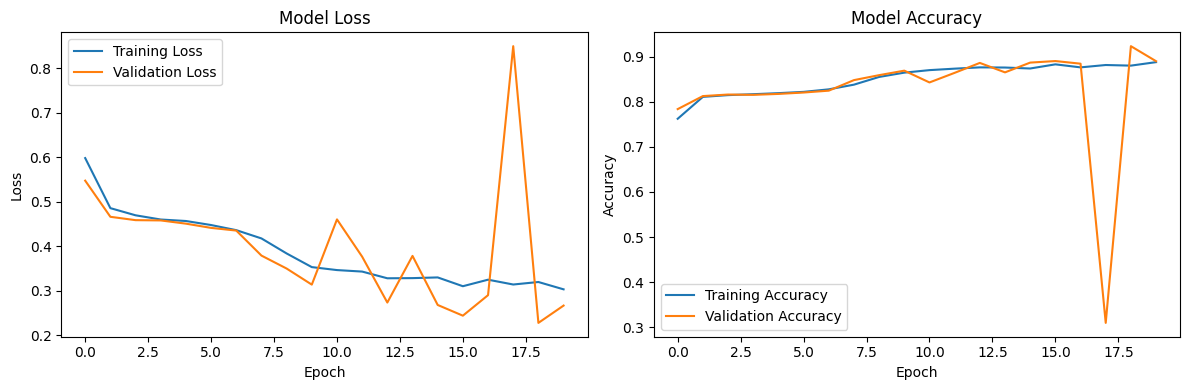

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


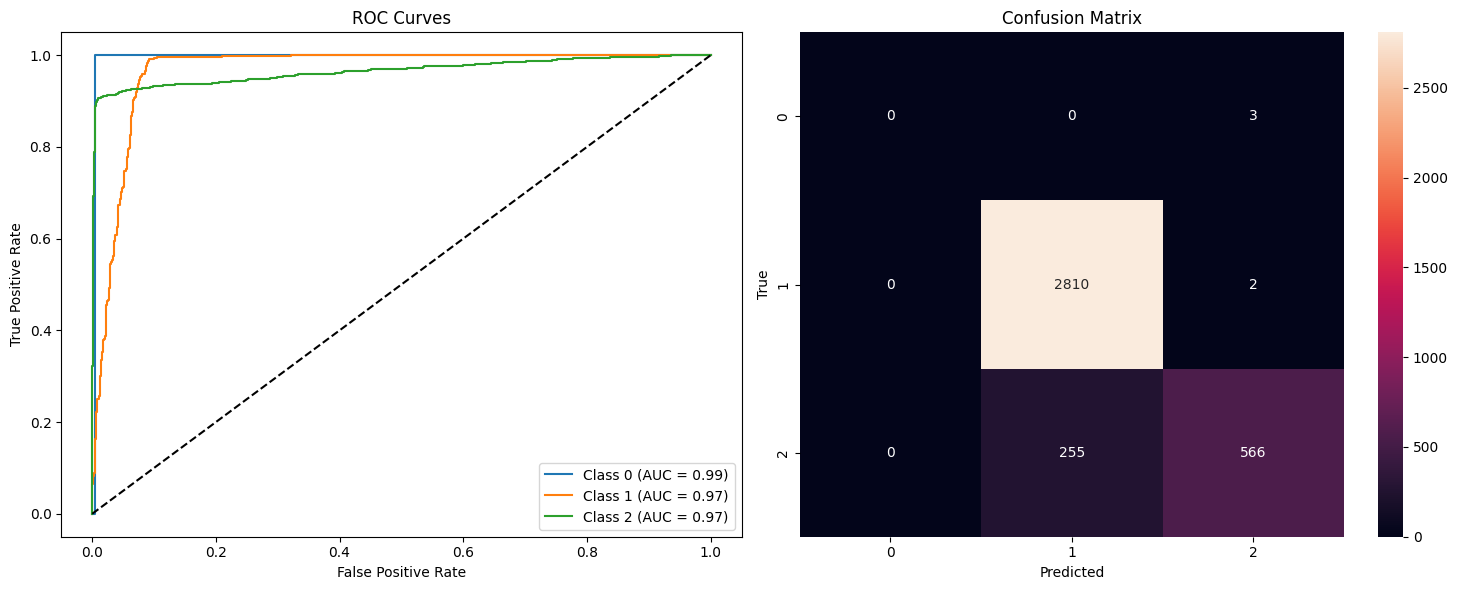


Model Performance Metrics:
Accuracy: 0.9285
F1 Score: 0.9232
Precision: 0.9329
Recall: 0.9285


In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, BatchNormalization, concatenate, Layer
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class ReshapeLayer(Layer):
    def __init__(self):
        super().__init__()
    
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

class LSTMBranch(Layer):
    def __init__(self, units, dropout_rate=0.2):
        super().__init__()
        self.reshape = ReshapeLayer()
        self.lstm = LSTM(units)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        
    def call(self, inputs):
        x = self.reshape(inputs)
        x = self.lstm(x)
        return self.dropout(x)

def build_lstm_lstm_model(num_lstm_units=32, text_lstm_units=64, dense_units=32, dropout_rate=0.2):
    # Inputs
    num_input = Input(shape=(3,))
    text_input = Input(shape=(100,))
    
    # LSTM branches
    num_branch = LSTMBranch(num_lstm_units, dropout_rate)(num_input)
    text_branch = LSTMBranch(text_lstm_units, dropout_rate)(text_input)
    
    # Combine
    combined = concatenate([num_branch, text_branch])
    bn = BatchNormalization()(combined)
    dense = Dense(dense_units, activation='relu')(bn)
    dropout = tf.keras.layers.Dropout(dropout_rate)(dense)
    output = Dense(3, activation='softmax')(dropout)
    
    model = Model(inputs=[num_input, text_input], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def evaluate_model(model, X_num_test, X_text_test, y_test):
    # Get predictions
    y_pred_proba = model.predict([X_num_test, X_text_test])
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred)
    f1 = f1_score(y_test_classes, y_pred, average='weighted')
    precision = precision_score(y_test_classes, y_pred, average='weighted')
    recall = recall_score(y_test_classes, y_pred, average='weighted')
    
    # ROC curves
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(3):  # 3 classes
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_classes, y_pred)
    
    # Plot results
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
    
    # ROC curves
    for i in range(3):
        ax1.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curves')
    ax1.legend()
    
    # Confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', ax=ax2)
    ax2.set_title('Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('True')
    
    plt.tight_layout()
    plt.show()
    
    # Print metrics
    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

# Train and evaluate model
def train_and_evaluate():
    # Prepare data
    numerical_features = X_scaled.values
    text_features = np.array(df_vectors)
    y_encoded = tf.keras.utils.to_categorical(y)
    
    # Split data
    X_num_train, X_num_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
        numerical_features, text_features, y_encoded, 
        test_size=0.2, random_state=42
    )
    
    # Define hyperparameters
    params = {
        'num_lstm_units': 32,
        'text_lstm_units': 64,
        'dense_units': 32,
        'dropout_rate': 0.2
    }
    
    # Build and train model
    model = build_lstm_lstm_model(**params)
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    
    history = model.fit(
        [X_num_train, X_text_train],
        y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate model
    evaluate_model(model, X_num_test, X_text_test, y_test)
    
    return model, history

# Run the training and evaluation
model, history = train_and_evaluate()

Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_248', 'keras_tensor_249']. Received: the structure of inputs=('*', '*')
  warnings.warn(


364/364 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7786 - loss: 0.6114 - val_accuracy: 0.3647 - val_loss: 0.8147 - learning_rate: 0.0010
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.2208 - val_accuracy: 0.9660 - val_loss: 0.1738 - learning_rate: 0.0010
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1694 - val_accuracy: 0.9642 - val_loss: 0.1484 - learning_rate: 0.0010
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9624 - loss: 0.1498 - val_accuracy: 0.9649 - val_loss: 0.1467 - learning_rate: 0.0010
Epoch 5/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.1411 - val_accuracy: 0.9642 - val_loss: 0.1411 - learning_rate: 0.0010
Epoch 6/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1406 - val_accuracy: 0.9646 - val_loss: 0.1351 - learning_rate: 0.0010
Epoch 7/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1235 - val_accurac

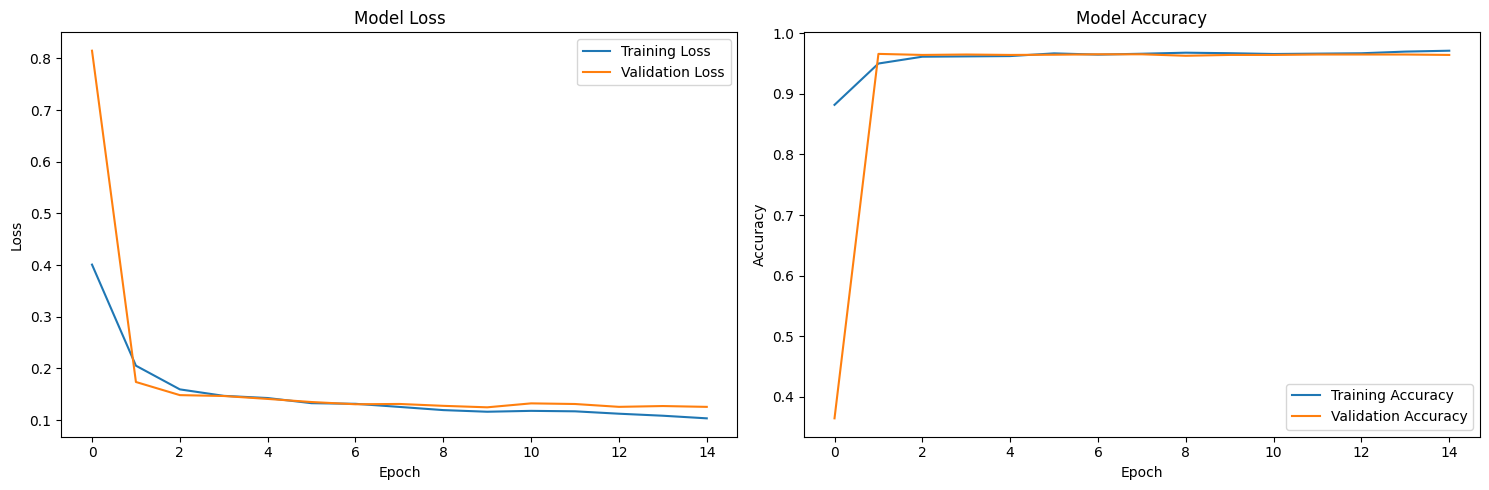

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Model Performance Metrics:
Accuracy: 0.9761
F1 Score: 0.9756
Precision: 0.9754
Recall: 0.9761


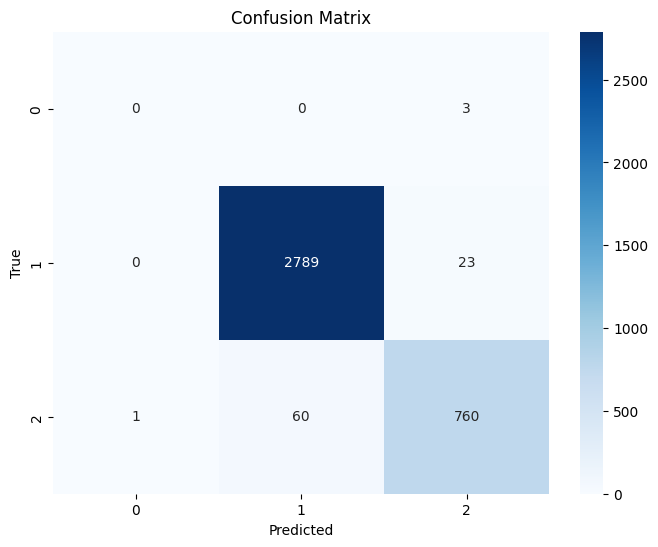

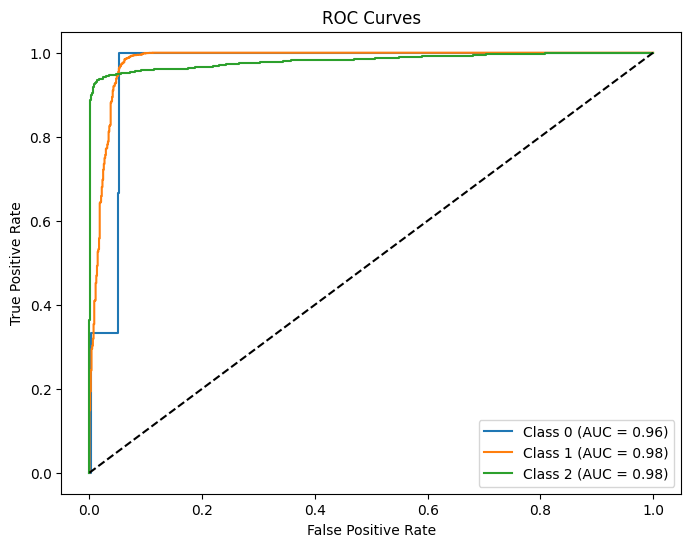

In [29]:
def build_enhanced_lstm_lstm_model(num_lstm_units=32, text_lstm_units=64, dense_units=32, dropout_rate=0.2):
    # Inputs
    num_input = Input(shape=(3,))
    text_input = Input(shape=(100,))
    
    # Batch Normalization for inputs
    num_bn = BatchNormalization()(num_input)
    text_bn = BatchNormalization()(text_input)
    
    # LSTM branches with improved initialization
    num_branch = LSTMBranch(num_lstm_units, dropout_rate)(num_bn)
    text_branch = LSTMBranch(text_lstm_units, dropout_rate)(text_bn)
    
    # Combine branches
    combined = concatenate([num_branch, text_branch])
    
    # Dense layers with ELU and BatchNorm
    x = Dense(dense_units, 
              kernel_initializer=HeNormal(),
              use_bias=False)(combined)
    x = BatchNormalization()(x)
    x = ELU()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    
    # Additional dense layer
    x = Dense(dense_units // 2,
              kernel_initializer=HeNormal(),
              use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ELU()(x)
    x = tf.keras.layers.Dropout(dropout_rate/2)(x)
    
    # Output layer
    output = Dense(3, 
                  activation='softmax',
                  kernel_initializer=HeNormal())(x)
    
    model = Model(inputs=[num_input, text_input], outputs=output)
    
    # Use Adam optimizer with fixed learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def train_and_evaluate_enhanced():
    # Prepare data
    numerical_features = X_scaled.values
    text_features = np.array(df_vectors)
    y_encoded = tf.keras.utils.to_categorical(y)
    
    # Split data
    X_num_train, X_num_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
        numerical_features, text_features, y_encoded, 
        test_size=0.2, random_state=42
    )
    
    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        mode='min'
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.00001
    )
    
    # Build and train model
    model = build_enhanced_lstm_lstm_model(
        num_lstm_units=64,    
        text_lstm_units=128,  
        dense_units=64,       
        dropout_rate=0.3      
    )
    
    history = model.fit(
        [X_num_train, X_text_train],
        y_train,
        validation_split=0.2,
        epochs=50,            
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate model
    y_pred_proba = model.predict([X_num_test, X_text_test])
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred)
    f1 = f1_score(y_test_classes, y_pred, average='weighted')
    precision = precision_score(y_test_classes, y_pred, average='weighted')
    recall = recall_score(y_test_classes, y_pred, average='weighted')
    
    # Print metrics
    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()
    
    return model, history

# Run the enhanced model
model, history = train_and_evaluate_enhanced()

Epoch 1/50


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_230', 'keras_tensor_231']. Received: the structure of inputs=('*', '*')
  warnings.warn(


364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8075 - loss: 0.5242 - val_accuracy: 0.4572 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1844 - val_accuracy: 0.9653 - val_loss: 0.1515 - learning_rate: 0.0010
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.1436 - val_accuracy: 0.9646 - val_loss: 0.1505 - learning_rate: 0.0010
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1419 - val_accuracy: 0.9642 - val_loss: 0.1371 - learning_rate: 0.0010
Epoch 5/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9610 - loss: 0.1386 - val_accuracy: 0.9649 - val_loss: 0.1418 - learning_rate: 0.0010
Epoch 6/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1242 - val_accuracy: 0.9649 - val_loss: 0.1301 - learning_rate: 0.0010
Epoch 7/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1282 - val_accurac

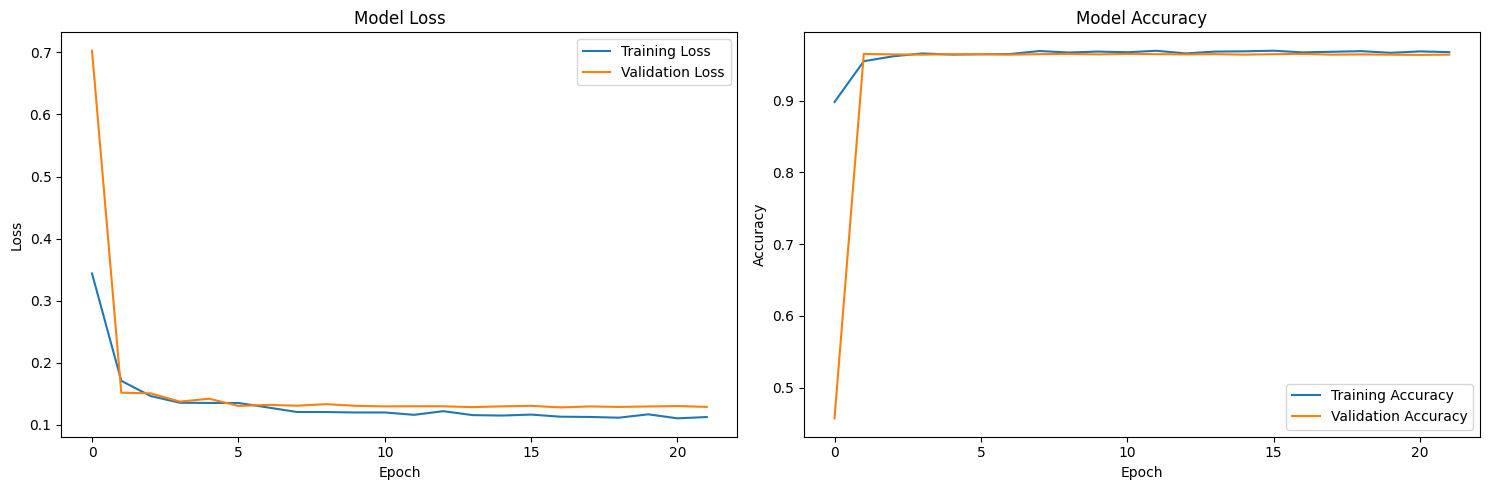

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Model Performance Metrics:
Accuracy: 0.9758
F1 Score: 0.9751
Precision: 0.9750
Recall: 0.9758


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


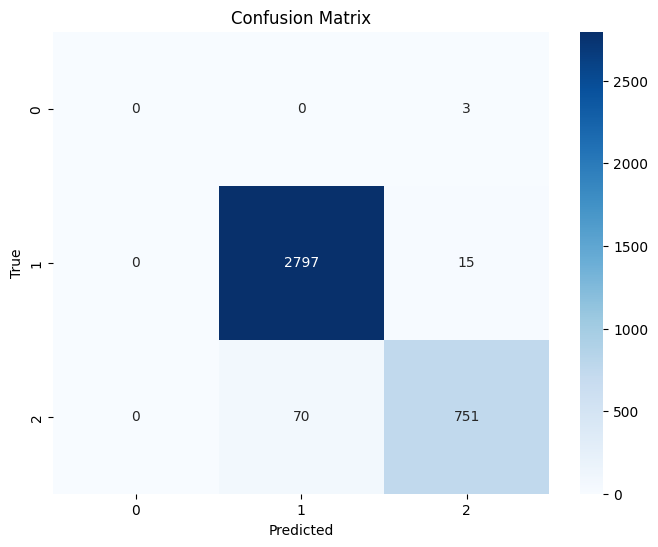

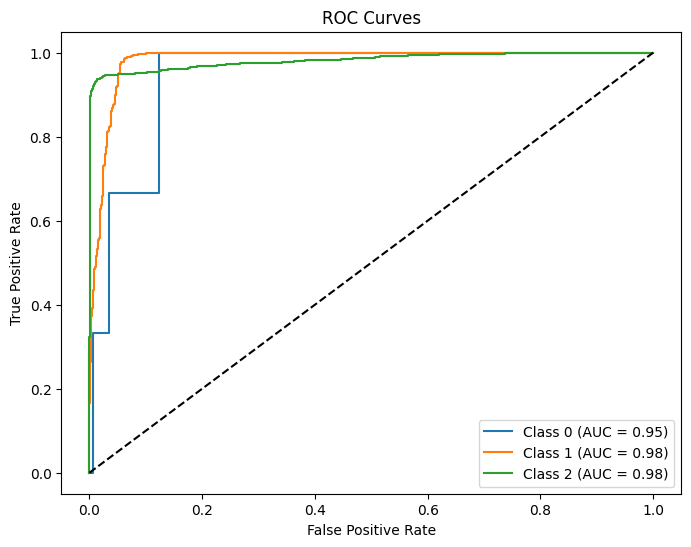

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, BatchNormalization, concatenate, Layer, ELU
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import HeNormal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Custom layers
class ReshapeLayer(Layer):
    def __init__(self):
        super().__init__()
    
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=1)

class LSTMBranch(Layer):
    def __init__(self, units, dropout_rate=0.2):
        super().__init__()
        self.reshape = ReshapeLayer()
        self.lstm = LSTM(units, 
                        kernel_initializer=HeNormal(),
                        recurrent_initializer=HeNormal())
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.bn = BatchNormalization()
        
    def call(self, inputs, training=None):
        x = self.reshape(inputs)
        x = self.lstm(x)
        x = self.bn(x, training=training)
        return self.dropout(x, training=training)

def build_enhanced_lstm_lstm_model(num_lstm_units=32, text_lstm_units=64, dense_units=32, dropout_rate=0.2):
    # Inputs
    num_input = Input(shape=(3,))
    text_input = Input(shape=(100,))
    
    # Batch Normalization for inputs
    num_bn = BatchNormalization()(num_input)
    text_bn = BatchNormalization()(text_input)
    
    # LSTM branches with improved initialization
    num_branch = LSTMBranch(num_lstm_units, dropout_rate)(num_bn)
    text_branch = LSTMBranch(text_lstm_units, dropout_rate)(text_bn)
    
    # Combine branches
    combined = concatenate([num_branch, text_branch])
    
    # Dense layers with ELU and BatchNorm
    x = Dense(dense_units, 
              kernel_initializer=HeNormal(),
              use_bias=False)(combined)
    x = BatchNormalization()(x)
    x = ELU()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    
    # Additional dense layer
    x = Dense(dense_units // 2,
              kernel_initializer=HeNormal(),
              use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ELU()(x)
    x = tf.keras.layers.Dropout(dropout_rate/2)(x)
    
    # Output layer
    output = Dense(3, 
                  activation='softmax',
                  kernel_initializer=HeNormal())(x)
    
    model = Model(inputs=[num_input, text_input], outputs=output)
    
    # RMSprop optimizer
    optimizer = tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        rho=0.9,
        momentum=0.0,
        epsilon=1e-07
    )
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def train_and_evaluate_enhanced():
    # Prepare data
    numerical_features = X_scaled.values
    text_features = np.array(df_vectors)
    y_encoded = tf.keras.utils.to_categorical(y)
    
    # Split data
    X_num_train, X_num_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
        numerical_features, text_features, y_encoded, 
        test_size=0.2, random_state=42
    )
    
    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        mode='min'
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.00001
    )
    
    # Build and train model
    model = build_enhanced_lstm_lstm_model(
        num_lstm_units=64,    
        text_lstm_units=128,  
        dense_units=64,       
        dropout_rate=0.3      
    )
    
    history = model.fit(
        [X_num_train, X_text_train],
        y_train,
        validation_split=0.2,
        epochs=50,            
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Plot training history
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Evaluate model
    y_pred_proba = model.predict([X_num_test, X_text_test])
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_classes, y_pred)
    f1 = f1_score(y_test_classes, y_pred, average='weighted')
    precision = precision_score(y_test_classes, y_pred, average='weighted')
    recall = recall_score(y_test_classes, y_pred, average='weighted')
    
    # Print metrics
    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()
    
    return model, history

# Run the enhanced model
model, history = train_and_evaluate_enhanced()